In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
from cartopy.mpl.geoaxes import GeoAxes
import cmocean
import cmocean.cm as cmo
import matplotlib.cm as cm
from matplotlib import ticker

# Grids For Data Counts

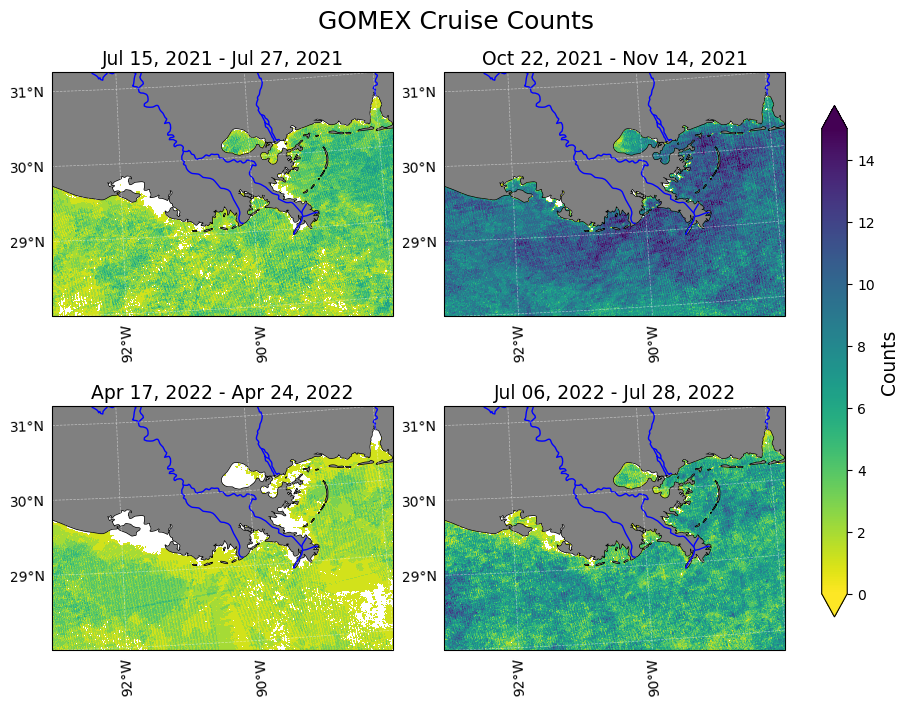

In [4]:
#For the figure we're making here, we're using files I created that combines all data files from the period 
#  of interest. In this case, the periods are the 4 cruises that the lab went on from 2021-2022.



#This establishes the directory we're planning on using. "glob" takes all files with this directory name using
#  "*" as a wildcard, and makes the files into a list. "cfile.sort()" sorts these files in alphabetical order
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

#Just some variables establishing the extent we're using for our figure
lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

#To be honest, I"m not 100% sure how this part of the code works, but it establishes the resolution of the 
#  files we're using to make our figures turn out nice. The units are in meters, and the MODIS files I used
#  are 1km resolution
resval = 1000 
res = xr.DataArray(resval, attrs={"units": "meters"})

#Creating the fig object. This method allows us to create a large figure made of a grid of smaller "figures"
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(9, 7),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        
#List of titles we're using. The "cfile.sort()" at the beginning of the code makes it so the files are
#  in alphabetical order. This means that each title will always correspond to the correct data
title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']

#The "enumerate" here takes each object in "axgr" and gives it 2 assignments like such: (i, ax). "i" is the 
#  object's position in the list starting from 0 and counting up, and ax is the list item itself. In this case,
#  each list item is one of the smaller "figures" we're creating in the bigger figure, and we can give each 
#  smaller figure its own data and parameters this way. axgr.flatten() just takes the axgr object, which is 
#  currently a 2x2 grid, and flattens it into 1 dimension, making it a list of 4 objects.
for i, ax in enumerate(axgr.flatten()):
    try:
        
        #Opening the file containing the data as an xarray
        ds = xr.open_dataset(cfile[i])
        
        #Selecting the variable of interest within that data file. You can define these when you create the
        #  combined file. We do "ds" to indicate the dataset, "aCDOM300" to choose the specific variable, 
        #  and "count" to indicate that we will be displaying counts of data. In other words, what's plotted
        #  is the *number* of data points in each coordinate point on the map, and not the value of each data
        #  point itself. If we want an idea of what the actual values are, we can do "mean" instead, which will
        #  take the average of all data points in each coordinate point and display it there.
        data = ds.aCDOM300.count('time')
        
        #Plotting the data
        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=15, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap='viridis_r')
        
        #Everything after this is just additional parameters for the figure itself, like axis labels and titles.
        #  Each line is pretty self-explanatory, but let me know if you have any specific questions. 
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    #We're using "try" and "except" here so that, if there is an odd number in our grid, the last "mini figure," 
    #  which won't have any data, is deleted, and it's just an empty space. It just makes the figure look nicer
    except:
        ax.remove()
        pass
    
#Creates a main title for our figure
fig.suptitle('GOMEX Cruise Counts', size=18)

#Creates a colorbar corresponding to the data variable we chose earlier
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')

#Creates a label for the colorbar
cb.set_label('Counts', size=13.5)

#Saves the figure to the following directory
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task2/CruiseCounts.png')

# HIstogram

(array([[11.,  0., 10., ..., 21.,  1.,  0.],
        [ 0.,  2., 16., ...,  6.,  3.,  0.],
        [ 1.,  8.,  6., ..., 14.,  5.,  2.],
        ...,
        [ 2., 11., 45., ...,  0.,  0.,  0.],
        [ 1., 16., 48., ...,  2.,  0.,  0.],
        [ 4., 16., 45., ...,  0.,  0.,  0.]]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 542 BarContainer objects>)

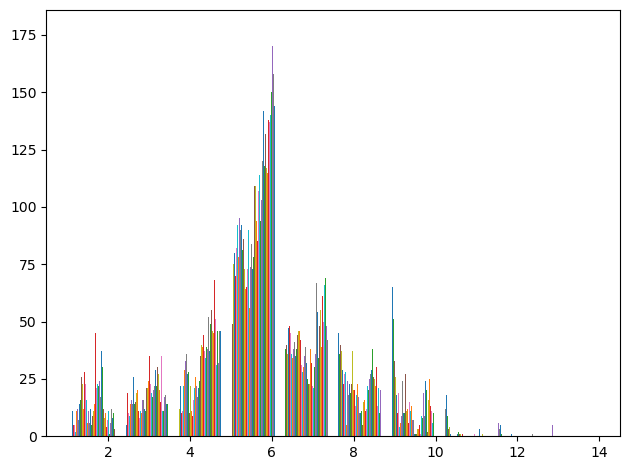

In [4]:
#Histograms are a good way of visualizing your dataset. You can use it to check that your data file was probably
#  created correctly, since we can generally expect normal datasets to generate a bell curve for 
#  data distribution.

#Creating a list of the files we're using. Alaternatively, you could just define one file here, but I find this
#  to be easier
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()




#Creating a figure object so that we can display the histogram data.
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)

#Opening the dataset with xarray
ds = xr.open_dataset(cfile[3])

#Defining the variable (here, aCDOM300) and type of data (here, counts) we're using. 
data = ds.aCDOM300.count('time')
        
#Telling the figure object that we want the data displayed as a histogram, and to not include any points where
#  the data is 0.
ax.hist(data.where(data!=0))

#You'll notice that in the histogram, there might be regularly-spaced gaps in the data. I'm not too sure
#  what causes this, but it's probably something to do with the equation I'm using to generate this specific data.
